In [ ]:
#cleanup tasks - venkata
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

scaler = StandardScaler()

In [12]:
test_df = pd.read_csv('../docs/test.csv')
# test_df.head()
train_df = pd.read_csv('../docs/train.csv')
train_df.head()

missing_values_in_test = test_df.isnull().sum()
print(missing_values_in_test)


def process_correlation(df):
    # Compute the correlation matrix
    correlation_matrix = train_df.corr(numeric_only=True)

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


def preprocess_dataframe(df):
    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Scale numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Encode categorical columns
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_categorical = encoder.fit_transform(df[categorical_cols])

    # Convert encoded values to a DataFrame
    encoded_categorical_df = pd.DataFrame(
        encoded_categorical,
        columns=encoder.get_feature_names_out(categorical_cols),
        index=df.index
    )

    # Drop original categorical columns and concatenate the encoded DataFrame
    df = pd.concat([df.drop(categorical_cols, axis=1), encoded_categorical_df], axis=1)
    # process correlation features
    process_correlation(df)

    return df

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


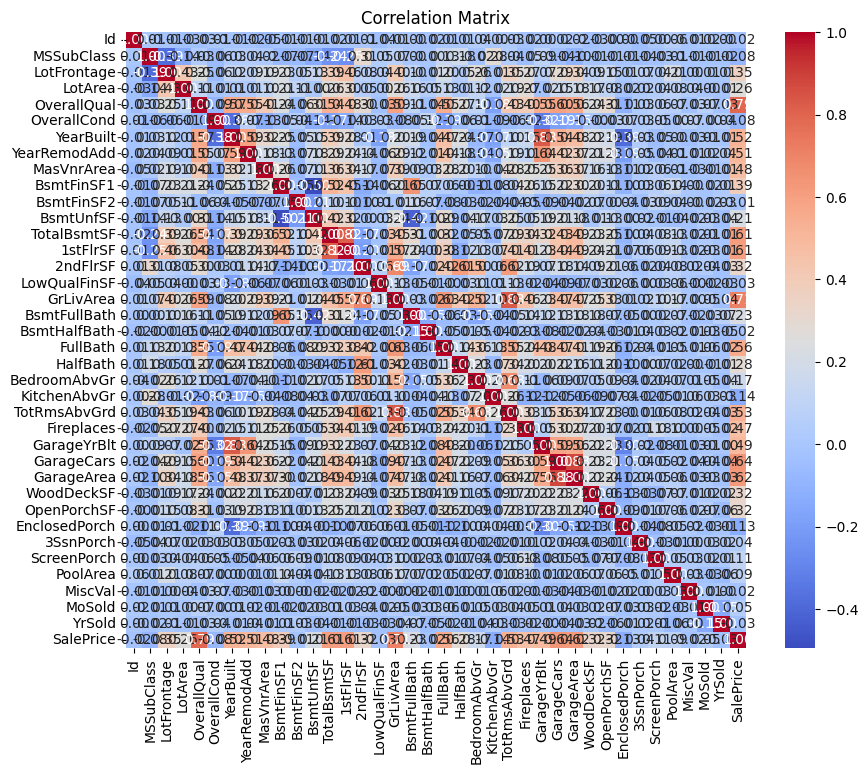

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0   1.050994      0.878668    0.510015    0.575425  ...             0.0   
1   0.156734     -0.429577   -0.572835    1.171992  ...             0.0   
2   0.984752      0.830215    0.322174    0.092907  ...             0.0   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...             0.0   
4   0.951632      0.733308    1.360826    0.463568  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0        

In [13]:
# Load the dataset
X = train_df.drop('SalePrice', axis=1)  # Replace 'target_column' with the actual target column name
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocess
X = preprocess_dataframe(X)
print(X.head())

In [ ]:
train_df = pd.read_csv('../docs/train.csv')
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(train_df[numerical_cols])
plt.show()